### Q5-7 from Assignment 04 (Q1-4 submitted via word)

In [28]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt     
import seaborn as sns 

In [7]:
#p-Value direct formula example
st.t.cdf(x = 1.96, df = 2)

0.9054713451991339

In [18]:
#p-Value based on cdf example
x = st.norm.cdf(3.2055)
1-x

0.0006741402339329738

### Q5.  

#### Twenty people have rated a new beer on a taste scale of 0 to 100. Their ratings are in the file Q5_Beer_Taste.xlsx. Marketing has determined that the beer will be a success if the average taste rating exceeds 76. Using a 5% significance level, is there sufficient evidence to conclude that the beer will be a success? Discuss your result in terms of a pvalue. Assume ratings are at least approximately normally distributed. 

Link containing the assignment data files

https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/tree/main/ClassAssignment/Assignment04 


df_beer_taste = pd.read_excel('Q5_Beer_Taste.xlsx')

In [22]:
#Exploring the data
df_beer_taste.head()

,Person,Rating
0,1,100
1,2,57
2,3,70
3,4,92
4,5,94


In [23]:
#Checking key stats
df_beer_taste.describe()

,Person,Rating
count,60.000000,60.00000
mean,30.500000,79.75000
std,17.464249,14.50263
min,1.000000,48.00000
25%,15.750000,70.00000
50%,30.500000,81.50000
75%,45.250000,91.25000
max,60.000000,100.00000


In [27]:
#Checking for null values
df_beer_taste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Person  60 non-null     int64
 1   Rating  60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [32]:
##  Find the mean and variance 
print("N:", df_beer_taste.shape[0])

mean = df_beer_taste.Rating.mean()
sd = df_beer_taste.Rating.std()
N = df_beer_taste.shape[0]
print("Mean rating:", mean, " Std. dev rating:", sd)

N: 60
Mean rating: 79.75  Std. dev rating: 14.502629802433788


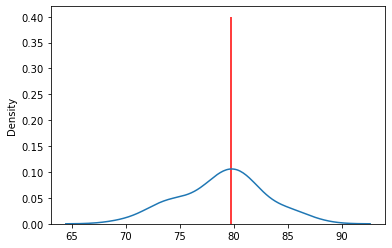

In [36]:
# Generating a Normal distribution plot based on the assumption that the ratings are normally distributed
mean_rating_rv = st.norm.rvs(loc= mean, scale=sd/math.sqrt(sd), size= N)
sns.kdeplot(mean_rating_rv)
plt.vlines(x=mean, ymin=0, ymax=0.4, colors = 'r')

In [62]:
#We will go for a 2-tailed z-test as an average person may like it more or less than the determined rating
#Calculating the required statistics
p_alpha = .05
xi = 76
x_mean = mean
sdn = sd/math.sqrt(sd)

z= (xi-x_mean)/sdn
print('z:', z)

z: -0.9847089542893152


In [63]:
#P-value via conventional methods
p_z = (1 - st.norm.cdf(abs(z)))*2

print('p_z:', p_z)

p_z: 0.3247670531160298


In [70]:
#p_value via direct method for t-test
p_val = st.ttest_1samp(a=df_beer_taste.Rating, popmean=76, alternative='two-sided')

print(f'The p-value is {p_val.pvalue}')

The p-value is 0.049788870909513824


### The difference between the p values cannot be explained. 
Considering the p value found via conventional methods. Since p_z (.324) is greater than .05, we cannot reject the null hypothesis that the current rating is equal to 76

## Q6


#### Q6. A market research consultant hired by a leading soft drink company wants to determine the proportion of consumers who favor its low-calorie drink over the leading competitor’s low-calorie drink in a particular urban location. A random sample of 250 consumers from the market under investigation is provided in the file Q6_Lowcalorie_Drink.xlsx. 
 
a.	Find a 95% confidence interval for the proportion of all consumers in this market who prefer this company’s drink over the competitors. What does this confidence interval tell us? 
b.	Does the confidence interval in part a support the claim made by one of the company’s marketing managers that more than half of the consumers in this urban location favor its drink over the competitor’s? Explain your answer. 
c.	Comment on the sample size used in this study. Specifically, is the sample unnecessarily large? Is it too small? Explain your reasoning.  

Link containing the assignment data files

https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/tree/main/ClassAssignment/Assignment04 


#### Answer - We will apply normal distribution for proportions

In [74]:
df_drink = pd.read_excel('Q6_Lowcalorie_Drink.xlsx')

In [76]:
df_drink.head()

,Consumer,Gender,Age,Preference
0,1,F,Over 60,Our brand
1,2,F,Between 40 and 60,Our brand
2,3,M,Between 40 and 60,Our brand
3,4,F,Over 60,Competing brand
4,5,M,Between 20 and 40,Our brand


In [75]:
#Checking data quality
df_drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Consumer    250 non-null    int64 
 1   Gender      250 non-null    object
 2   Age         250 non-null    object
 3   Preference  250 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.9+ KB


In [80]:
df_drink['Preference'].value_counts()

Our brand          134
Competing brand    116
Name: Preference, dtype: int64

In [98]:
#Statistics 

n = df_drink['Preference'].shape[0]
p = df_drink['Preference'].value_counts()['Our brand']/df_drink['Preference'].shape[0]
sd = math.sqrt(p*(1-p)/n)


##  Find the mean and variance 
print("N:", n)

mean = p
sd = sd
N = df_drink['Preference'].shape[0]
print("Mean proportion:", mean, " Std. dev prop:", sd)

N: 250
Mean proportion: 0.536  Std. dev prop: 0.031540703860250166


In [93]:
#Geenerating the confidence interval (Ans6.a)
st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=sd)

(0.4738794209159352, 0.5981205790840648)

#### Ans 6a - Based on the confidence interval we can say that between 47% to 59% of the company's consumers prefer their brand over the competitor's.

#### Q6b.	Does the confidence interval in part a support the claim made by one of the company’s marketing managers that more than half of the consumers in this urban location favor its drink over the competitor’s? Explain your answer. 

##### Approach - We can test this by finding the overlap when the mean is assumed to be 0.5

In [97]:
#Calculating the probability that more than 50
p2 = .5
sd2 = math.sqrt(p2*(1-p2)/n)
st.t.interval(alpha=0.95, df=n-1, loc=p2, scale=sd2)

(0.43771777562585346, 0.5622822243741465)

#### Ans 6b - Since the ranges overlap, we can say that the confidence interval in part supports the claim made by the marketing manager that more than half of the consumers favor the company's drink over the competitors

#### Q6c.	Comment on the sample size used in this study. Specifically, is the sample unnecessarily large? Is it too small? Explain your reasoning.  


##### Approach - We can calculate sample size using the Cochran's formula

In [101]:
# Inputs

e = p2 - mean # Calculating margin of error based on required proportion and estimated proportion
z = 1.96
p = 0.5
q = 0.5

n = z*z*p*q/(e*e)
 
print('The appropriate sample size :', n)

The appropriate sample size : 741.0493827160481


#### Ans 6c - The appropriate sample size is 741 as per Cochran's formula. 

### Q7

#### Q7. A large buyer of household batteries wants to decide which of two equally priced brands to purchase. To do this, he takes a random sample of 100 batteries of each brand. The lifetimes, measured in hours, of the batteries are recorded in the file Q7_Battery_life.xlsx. Before testing for the difference between the mean lifetimes of these two batteries, he must first determine whether the underlying population variances are equal. 
a.	Perform a test for equal population variances.  Report a p-value and interpret its meaning. 
b.	Based on your conclusion in part a, which test statistic should be used in performing a test for the difference between population means?  
 
 
 
All data files are posted at the link below: 
https://github.com/Accelerate-AI/Data-Science-GlobalBootcamp/tree/main/ClassAssignment/Assignment04 
 


#### Approach - Assuming normal distribution, we will use the Levine Test

Ref Link
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [107]:
df_battery_life_brand_1 = pd.read_excel('Q7_Battery_life.xlsx', 'Brand1')
df_battery_life_brand_2 = pd.read_excel('Q7_Battery_life.xlsx', 'Brand2')

In [109]:
df_battery_life_brand_1.head()

,Battery,Lifetime
0,1,99.11
1,2,99.45
2,3,98.39
3,4,97.07
4,5,99.97


In [110]:
df_battery_life_brand_2.head()

,Battery,Lifetime
0,1,110.65
1,2,92.24
2,3,96.63
3,4,99.45
4,5,102.55


In [111]:
df_battery_life_brand_1.info() #Checking data quality

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Battery   100 non-null    int64  
 1   Lifetime  100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [112]:
df_battery_life_brand_2.info() #Checking data quality

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Battery   100 non-null    int64  
 1   Lifetime  100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [115]:
#Calculating the mean and standard  deviation for both datasets

mean1 = df_battery_life_brand_1.Lifetime.mean()
sd1 = df_battery_life_brand_1.Lifetime.std()
N1 = df_battery_life_brand_1.Lifetime.shape[0]

mean2 = df_battery_life_brand_2.Lifetime.mean()
sd2 = df_battery_life_brand_2.Lifetime.std()
N2 = df_battery_life_brand_2.Lifetime.shape[0]

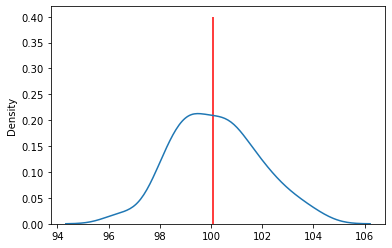

In [116]:
# Generating a Normal distribution plot based on the assumption that the ratings are normally distributed
mean_rating_rv1 = st.norm.rvs(loc= mean1, scale=sd1/math.sqrt(sd1), size= N1)
sns.kdeplot(mean_rating_rv1)
plt.vlines(x=mean1, ymin=0, ymax=0.4, colors = 'r')

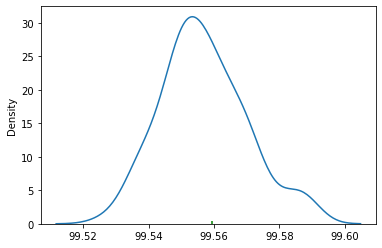

In [118]:
# Generating a Normal distribution plot based on the assumption that the ratings are normally distributed
mean_rating_rv2 = st.norm.rvs(loc= mean2, scale=sd/math.sqrt(sd2), size= N2)
sns.kdeplot(mean_rating_rv2)
plt.vlines(x=mean2, ymin=0, ymax=0.4, colors = 'g')

### Based on the visualizations, we can assume that both the samples are normally distributed. We can also calculate skewness to test them

In [121]:
#Ref - 
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

from scipy.stats import skew
  
# Creating datasets
dataset1 = df_battery_life_brand_1.Lifetime
dataset2 = df_battery_life_brand_2.Lifetime
  
# Calculate the skewness
print('The skewness of dataset 1 is : ', skew(dataset1, axis=None, bias=True))
print('The skewness of dataset 1 is : ', skew(dataset2, axis=None, bias=True))

The skewness of dataset 1 is :  -0.06853348228066203
The skewness of dataset 1 is :  -0.15066080738424414


#### Based on the below reference, the skewness can be accepted. (Acceptable range between -2 and +2)

https://www.researchgate.net/post/What_is_the_acceptable_range_of_skewness_and_kurtosis_for_normal_distribution_of_data

In [124]:
#Applying the levene test

#Ref - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

stat, p_levene = scipy.stats.levene(dataset1, dataset2)

print('The p value for Population variance comparision is : ', p_levene)

The p value for Population variance comparision is :  1.8999110861507269e-10


#### Ans 7a - The test has been performed using Levene test. The p value is low (1.8999110861507269e-10), hence we can conclude that the population variances are not equal

#### Ans 7b - As we have unequal variances, we use a 2-group t test (for indpendent variables), ref below. Since it is a large sample size, the pooled variance formula would be as mentioned below.



https://www.isixsigma.com/tools-templates/hypothesis-testing/making-sense-two-sample-t-test/

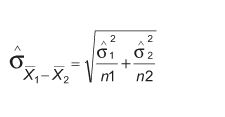